In [132]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
import numpy as np
from holoviews import opts
import panel as pn
pn.extension()
hv.extension('bokeh')
import geopandas as gpd
from shapely.geometry import Point
import folium
import branca.colormap as cm
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [133]:
# Define the folder path and file name
data_csv_file="data/commute/CSVLog_20240802_062846.CSV"

output_folder_path = 'output/date/analysis_20240802_am/'  # Change this to your folder path

df_file_name = "df.csv"
df_file_path = os.path.join(output_folder_path, df_file_name)
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
#create folder folder if it does not exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

In [134]:
df=pd.read_csv(data_csv_file)
df.columns = df.columns.str.strip()
df_file_path = os.path.join(output_folder_path, df_file_name)
df.to_csv(df_file_path, index=False)
#df.head()

In [135]:
column_list=df.columns.tolist()
print(column_list)

['Time (sec)', 'Instant fuel economy (MPG)', 'Intake manifold absolute pressure (inHg)', 'Engine RPM (RPM)', 'Vehicle speed (MPH)', 'Relative throttle position (%)', 'Ambient air temperature (°F)', 'Fuel type', 'Relative accelerator pedal position (%)', 'Mass air flow rate (lb/min)', 'Boost (psi)', 'Engine Power (hp)', 'Trip Distance (miles)', 'Trip Fuel Economy (MPG)', 'Hard Brake Count', 'Latitude (deg)', 'Longitude (deg)', 'Bearing (deg)']


In [136]:
df=df[['Time (sec)', 'Vehicle speed (MPH)', 'Relative accelerator pedal position (%)','Engine RPM (RPM)', 'Boost (psi)', 'Engine Power (hp)','Mass air flow rate (lb/min)','Intake manifold absolute pressure (inHg)', 'Ambient air temperature (°F)','Trip Distance (miles)','Instant fuel economy (MPG)', 'Trip Fuel Economy (MPG)', 'Latitude (deg)', 'Longitude (deg)','Relative throttle position (%)','Hard Brake Count',]]
df.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg),Relative throttle position (%),Hard Brake Count
0,0.000,0.0,0.0,0.00,0.000000,3.538968,0.000000,0.000000,0.0,0.0,0.0,0.0,45.036170,-92.9851,0.000000,0
1,1.003,0.0,0.0,583.50,-9.282415,4.130809,0.000000,10.630836,71.6,0.0,0.0,0.0,45.036167,-92.9851,3.137255,0
2,2.001,0.0,0.0,583.50,-9.282415,4.130809,0.000000,10.630836,71.6,0.0,0.0,0.0,45.036163,-92.9851,3.137255,0
3,3.002,0.0,0.0,681.25,-8.992340,4.251593,0.377742,11.221438,71.6,0.0,0.0,0.0,45.036163,-92.9851,3.529412,0
4,3.993,0.0,0.0,681.25,-8.992340,4.251593,0.377742,11.221438,71.6,0.0,0.0,0.0,45.036160,-92.9851,3.529412,0


In [137]:
# To avoid math errors in situations where values = 0
df['Boost (psi)'] = df['Boost (psi)'].bfill().infer_objects()
df.loc[df['Boost (psi)'] == 0, 'Boost (psi)'] = 0.01

df.head()


,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg),Relative throttle position (%),Hard Brake Count
0,0.000,0.0,0.0,0.00,0.010000,3.538968,0.000000,0.000000,0.0,0.0,0.0,0.0,45.036170,-92.9851,0.000000,0
1,1.003,0.0,0.0,583.50,-9.282415,4.130809,0.000000,10.630836,71.6,0.0,0.0,0.0,45.036167,-92.9851,3.137255,0
2,2.001,0.0,0.0,583.50,-9.282415,4.130809,0.000000,10.630836,71.6,0.0,0.0,0.0,45.036163,-92.9851,3.137255,0
3,3.002,0.0,0.0,681.25,-8.992340,4.251593,0.377742,11.221438,71.6,0.0,0.0,0.0,45.036163,-92.9851,3.529412,0
4,3.993,0.0,0.0,681.25,-8.992340,4.251593,0.377742,11.221438,71.6,0.0,0.0,0.0,45.036160,-92.9851,3.529412,0


In [138]:
def clean_data(df):
    # Round columns 'Time (sec)', ' Engine RPM (RPM)' and 2 other columns (Number of decimals: 0)
    df = df.round({'Time (sec)': 0, 'Engine RPM (RPM)': 0, 'Engine Power (hp)': 0, 'Time (sec)': 0})
    # Round columns ' Instant fuel economy (MPG)', ' Vehicle speed (MPH)' and 4 other columns (Number of decimals: 1)
    df = df.round({'Instant fuel economy (MPG)': 1, 'Vehicle speed (MPH)': 1,'Relative throttle position (%)': 1, 'Relative accelerator pedal position (%)': 1, 'Trip Distance (miles)': 1, 'Trip Fuel Economy (MPG)': 1,'Boost (psi)':1})
    # Round columns ' Intake manifold absolute pressure (inHg)', ' Mass air flow rate (lb/min)', ' Bearing (deg)' (Number of decimals: 2)
    df = df.round({'Intake manifold absolute pressure (inHg)': 2, 'Mass air flow rate (lb/min)': 2,'Bearing (deg)': 2})
    # Drop columns: ' Intake manifold absolute pressure (inHg)', ' Mass air flow rate (lb/min)' and 3 other columns
    df = df.drop(columns=['Hard Brake Count','Relative throttle position (%)'])
    # Rename column 'Latitude (deg)' to 'latitude'
    df = df.rename(columns={'Latitude (deg)': 'latitude'})
    # Rename column 'Longitude (deg)' to 'longitude'
    df = df.rename(columns={'Longitude (deg)': 'longitude'})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
0,0.0,0.0,0.0,0.0,0.0,4.0,0.00,0.00,0.0,0.0,0.0,0.0,45.036170,-92.9851
1,1.0,0.0,0.0,584.0,-9.3,4.0,0.00,10.63,71.6,0.0,0.0,0.0,45.036167,-92.9851
2,2.0,0.0,0.0,584.0,-9.3,4.0,0.00,10.63,71.6,0.0,0.0,0.0,45.036163,-92.9851
3,3.0,0.0,0.0,681.0,-9.0,4.0,0.38,11.22,71.6,0.0,0.0,0.0,45.036163,-92.9851
4,4.0,0.0,0.0,681.0,-9.0,4.0,0.38,11.22,71.6,0.0,0.0,0.0,45.036160,-92.9851


In [139]:
#create dataframe where vehicle is stationary
df_stationary = df_clean[df_clean['Vehicle speed (MPH)'] == 0]
df_stationary.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
0,0.0,0.0,0.0,0.0,0.0,4.0,0.00,0.00,0.0,0.0,0.0,0.0,45.036170,-92.9851
1,1.0,0.0,0.0,584.0,-9.3,4.0,0.00,10.63,71.6,0.0,0.0,0.0,45.036167,-92.9851
2,2.0,0.0,0.0,584.0,-9.3,4.0,0.00,10.63,71.6,0.0,0.0,0.0,45.036163,-92.9851
3,3.0,0.0,0.0,681.0,-9.0,4.0,0.38,11.22,71.6,0.0,0.0,0.0,45.036163,-92.9851
4,4.0,0.0,0.0,681.0,-9.0,4.0,0.38,11.22,71.6,0.0,0.0,0.0,45.036160,-92.9851


In [140]:
#creates dataframe where the vehicle is moving or is about to begin motion after being stationary
df_clean['next_mph'] = df_clean['Vehicle speed (MPH)'].shift(-1)
mask = (df_clean['Vehicle speed (MPH)'] > 0) | ((df_clean['Vehicle speed (MPH)'] == 0) & (df_clean['next_mph'] > 0))
df_moving= df_clean[mask].drop(columns=['next_mph'])
df_moving.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
22,24.0,0.0,1.2,1136.0,-5.5,12.0,0.74,18.31,71.6,0.0,0.0,0.0,45.036110,-92.98511
23,25.0,1.9,4.7,1251.0,-5.2,15.0,1.07,18.90,71.6,0.0,1.7,0.2,45.036106,-92.98510
24,26.0,3.7,5.1,1395.0,-7.1,12.0,1.09,15.06,71.6,0.0,4.2,0.4,45.036095,-92.98509
25,27.0,6.8,0.0,1338.0,-10.4,6.0,0.79,8.27,71.6,0.0,16.6,1.1,45.036076,-92.98507
26,28.0,7.5,0.0,1082.0,-11.5,4.0,0.48,6.20,71.6,0.0,28.4,1.5,45.036057,-92.98502


In [141]:
#experimenting 
df_moving['Mass Air/Boost']=df_moving['Mass air flow rate (lb/min)']/df_moving['Boost (psi)']
df_moving['Mass Air/manPress']=df_moving['Mass air flow rate (lb/min)']/df_moving['Intake manifold absolute pressure (inHg)']
df_moving.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
22,24.0,0.0,1.2,1136.0,-5.5,12.0,0.74,18.31,71.6,0.0,0.0,0.0,45.036110,-92.98511,-0.134545,0.040415
23,25.0,1.9,4.7,1251.0,-5.2,15.0,1.07,18.90,71.6,0.0,1.7,0.2,45.036106,-92.98510,-0.205769,0.056614
24,26.0,3.7,5.1,1395.0,-7.1,12.0,1.09,15.06,71.6,0.0,4.2,0.4,45.036095,-92.98509,-0.153521,0.072377
25,27.0,6.8,0.0,1338.0,-10.4,6.0,0.79,8.27,71.6,0.0,16.6,1.1,45.036076,-92.98507,-0.075962,0.095526
26,28.0,7.5,0.0,1082.0,-11.5,4.0,0.48,6.20,71.6,0.0,28.4,1.5,45.036057,-92.98502,-0.041739,0.077419


In [142]:
#creates dataframe where vehicle is moving and speed is less than 10mph
mask = (df_moving['Vehicle speed (MPH)'] <= 10)
df_less_10 = df_moving[mask]
#df_less_10.head()
df_less_10.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1471.098039,4.252941,1.678431,960.823529,-8.382353,7.980392,0.706078,12.432353,70.188235,24.964706,10.545098,22.268627,44.899050,-93.266832,-0.156958,0.053326
std,765.861587,2.925088,2.896295,433.245136,2.514017,8.001225,0.566311,5.129460,0.747702,13.224475,8.005331,10.965628,0.072589,0.149307,0.294984,0.019521
min,24.000000,0.000000,0.000000,623.000000,-11.500000,4.000000,0.350000,6.200000,69.800000,0.000000,0.000000,0.000000,44.860350,-93.351920,-1.395000,0.035934
25%,1735.500000,1.900000,0.000000,623.000000,-10.000000,4.000000,0.430000,9.150000,69.800000,31.300000,6.350000,27.900000,44.860477,-93.342733,-0.076870,0.039341
50%,1893.000000,3.100000,0.000000,775.000000,-9.100000,4.000000,0.440000,10.930000,69.800000,32.000000,7.000000,27.900000,44.860477,-93.341920,-0.047253,0.045561
75%,1905.500000,6.800000,2.550000,1211.000000,-8.750000,6.500000,0.720000,11.665000,69.800000,32.000000,16.550000,27.900000,44.864519,-93.341920,-0.047058,0.057932
max,1918.000000,9.900000,9.000000,2110.000000,-1.600000,36.000000,2.960000,26.280000,71.600000,32.000000,29.700000,28.200000,45.036110,-92.984890,-0.035577,0.119307


In [143]:
#creates dataframe where vehicle is moving and speed is between 10 and 20mph
mask = (df_moving['Vehicle speed (MPH)'] >= 10) & (df_moving['Vehicle speed (MPH)'] <= 20)
df_10_20 = df_moving[mask]
#df_10_20.head()
df_10_20.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1700.062500,15.542188,3.381250,1319.578125,-7.676563,13.546875,1.178594,13.902500,69.940625,29.248438,32.743750,26.189063,44.875007,-93.317523,0.085768,0.075401
std,489.165726,2.744160,5.305579,336.687449,4.719253,15.099595,1.122391,9.612013,0.486881,8.568121,21.068489,6.153619,0.047115,0.097646,1.372473,0.018023
min,35.000000,10.600000,0.000000,749.000000,-11.900000,3.000000,0.340000,5.320000,69.800000,0.000000,2.900000,2.700000,44.860160,-93.351920,-3.657143,0.042889
25%,1782.750000,13.000000,0.000000,1176.250000,-11.500000,4.000000,0.407500,6.200000,69.800000,31.300000,13.925000,27.900000,44.860324,-93.345721,-0.129096,0.067719
50%,1855.500000,16.200000,0.000000,1239.000000,-10.100000,6.000000,0.610000,9.005000,69.800000,31.800000,31.600000,27.900000,44.860360,-93.344387,-0.044291,0.069549
75%,1875.250000,17.550000,6.100000,1349.250000,-3.675000,17.000000,1.697500,22.002500,69.800000,31.900000,49.050000,28.000000,44.864126,-93.342769,-0.032479,0.076941
max,1891.000000,19.900000,16.900000,2546.000000,3.800000,70.000000,5.080000,37.210000,71.600000,32.000000,74.800000,28.200000,45.035995,-92.984850,6.125000,0.136522


In [144]:
#creates dataframe where vehicle is moving and speed is between 20 and 30mph
mask = (df_moving['Vehicle speed (MPH)'] >= 20) & (df_moving['Vehicle speed (MPH)'] <= 30)
df_20_30 = df_moving[mask]
#df_20_30.head()
df_20_30.describe()


C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1393.466667,25.890000,5.446667,1500.400000,-4.673333,25.666667,2.084000,20.032667,70.22000,24.160000,51.260000,22.580000,44.903484,-93.263226,inf,0.088237
std,759.676870,2.918709,7.388515,355.920429,8.002066,26.736690,2.025992,16.279622,0.77433,13.533295,41.796961,9.966925,0.074079,0.156158,NaN,0.022191
min,37.000000,21.100000,0.000000,1183.000000,-12.000000,4.000000,0.360000,5.020000,69.80000,0.000000,4.400000,3.000000,44.860348,-93.351880,-0.270588,0.067669
25%,1726.250000,23.300000,0.000000,1224.500000,-11.900000,4.000000,0.380000,5.320000,69.80000,31.200000,7.000000,27.900000,44.863252,-93.349230,-0.034702,0.071429
50%,1800.000000,26.100000,1.950000,1296.000000,-8.800000,9.000000,0.915000,11.665000,69.80000,31.450000,49.300000,27.900000,44.864097,-93.346013,-0.031933,0.073473
75%,1818.750000,28.600000,10.200000,1790.250000,4.425000,53.250000,4.115000,38.540000,69.80000,31.600000,89.900000,28.000000,44.864944,-93.345710,0.774898,0.109672
max,1845.000000,29.800000,33.300000,2536.000000,7.500000,72.000000,5.870000,44.890000,71.60000,31.800000,112.200000,28.200000,45.035840,-92.984880,inf,0.146165


In [145]:
#creates dataframe where vehicle is moving and speed is between 30 and 40mph
mask = (df_moving['Vehicle speed (MPH)'] >= 30) & (df_moving['Vehicle speed (MPH)'] <= 40)
df_30_40 = df_moving[mask]
#df_30_40.head()
df_30_40.describe()

C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1685.978261,32.245652,2.971739,1464.782609,-7.565217,17.391304,1.444130,14.111739,69.917391,29.436957,73.376087,26.532609,44.874565,-93.324389,inf,0.085250
std,439.012806,2.285190,5.475508,447.016873,5.958233,28.232746,1.942175,12.143212,0.449347,7.836563,46.400068,5.502163,0.042878,0.090501,NaN,0.024884
min,47.000000,30.400000,0.000000,1241.000000,-12.000000,3.000000,0.370000,5.020000,69.800000,0.100000,3.500000,5.800000,44.860638,-93.351780,-3.483333,0.071429
25%,1791.250000,30.400000,0.000000,1276.250000,-11.675000,4.000000,0.425000,5.685000,69.800000,31.325000,26.900000,27.900000,44.862112,-93.349760,-0.073500,0.073705
50%,1803.500000,31.700000,0.000000,1294.000000,-11.000000,5.500000,0.575000,7.090000,69.800000,31.450000,81.950000,27.900000,44.864097,-93.347425,-0.040624,0.075397
75%,1830.750000,32.750000,3.500000,1402.000000,-4.975000,16.000000,1.520000,19.342500,69.800000,31.675000,116.525000,28.000000,44.864120,-93.345750,-0.032143,0.082807
max,1842.000000,39.800000,19.600000,3098.000000,9.000000,121.000000,8.260000,47.840000,71.600000,31.800000,151.100000,28.200000,45.035053,-92.985374,inf,0.175540


In [146]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 40) & (df_moving['Vehicle speed (MPH)'] <= 50)
df_40_50 = df_moving[mask]
#df_40_50.head()
df_40_50.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1160.666667,44.322222,5.277778,1994.222222,-5.433333,39.000000,3.051111,18.474444,69.8,20.766667,98.333333,20.666667,44.922415,-93.229190,0.405138,0.114619
std,832.251464,2.688763,7.922559,985.083725,9.601953,52.851206,3.999633,19.554249,0.0,15.500000,74.025013,11.150000,0.084412,0.182140,0.688430,0.054521
min,50.000000,40.400000,0.000000,1279.000000,-11.900000,4.000000,0.390000,5.320000,69.8,0.100000,4.800000,5.800000,44.865740,-93.350800,-0.046957,0.073308
25%,52.000000,42.300000,0.000000,1319.000000,-11.900000,4.000000,0.420000,5.320000,69.8,0.100000,6.400000,5.800000,44.866043,-93.350620,-0.038462,0.077068
50%,1714.000000,44.100000,0.000000,1369.000000,-11.500000,5.000000,0.480000,6.200000,69.8,31.100000,129.100000,28.100000,44.866390,-93.350525,-0.034454,0.080214
75%,1716.000000,45.400000,15.300000,3212.000000,4.800000,94.000000,7.230000,39.280000,69.8,31.100000,161.600000,28.100000,45.034935,-92.986610,0.884483,0.182714
max,1718.000000,48.500000,16.500000,3444.000000,11.600000,135.000000,10.260000,53.150000,69.8,31.100000,168.400000,28.100000,45.034992,-92.986070,1.516667,0.193039


In [147]:
mask = (df_moving['Vehicle speed (MPH)'] >= 50) & (df_moving['Vehicle speed (MPH)'] <= 60)
df_50_60 = df_moving[mask]
df_50_60.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,851.419753,57.412346,8.530864,1935.925926,-3.767901,31.765432,2.537037,21.848642,69.8,15.103704,57.834568,25.330864,45.021368,-93.231934,0.613716,0.110747
std,506.821859,2.051303,7.921989,316.711729,6.379182,29.869412,1.830174,12.999494,0.0,9.419772,50.218473,5.970210,0.075454,0.118209,5.266095,0.017927
min,53.000000,50.300000,0.000000,1498.000000,-11.900000,5.000000,0.500000,5.320000,69.8,0.200000,5.600000,5.800000,44.866764,-93.350610,-7.575000,0.089127
25%,428.000000,55.900000,0.000000,1777.000000,-10.000000,8.000000,0.950000,9.150000,69.8,7.300000,17.400000,25.000000,45.034878,-93.298935,-0.350909,0.102419
50%,849.000000,57.800000,7.800000,1812.000000,-3.900000,22.000000,2.380000,21.560000,69.8,15.100000,36.500000,27.900000,45.054764,-93.280020,-0.081731,0.104696
75%,906.000000,59.000000,12.900000,1918.000000,0.900000,44.000000,3.190000,31.300000,69.8,16.000000,107.200000,28.100000,45.069366,-93.124245,0.747143,0.109763
max,1712.000000,59.700000,29.000000,3220.000000,10.900000,144.000000,7.710000,51.680000,69.8,31.100000,153.300000,28.300000,45.070023,-92.986916,31.900000,0.198811


In [148]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 60) & (df_moving['Vehicle speed (MPH)'] <= 70)
df_60_70 = df_moving[mask]
#df_60_70.head()
df_60_70.describe()

C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1.224000e+03,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,980.762255,66.498529,7.292157,2082.241013,-3.315278,32.075163,2.771863,22.782688,6.980000e+01,17.542565,49.543791,26.567974,45.006739,-93.265783,inf,0.120053
std,451.741787,2.544675,6.115435,160.593121,5.487865,22.708885,1.485424,11.172819,1.421666e-14,8.368189,39.775110,2.246059,0.062465,0.102718,NaN,0.008444
min,60.000000,60.300000,0.000000,1792.000000,-11.900000,6.000000,0.590000,5.320000,6.980000e+01,0.300000,4.600000,6.800000,44.867860,-93.350910,-37.600000,0.104839
25%,628.750000,64.600000,0.000000,2014.000000,-7.700000,15.000000,1.647500,13.880000,6.980000e+01,11.175000,20.200000,26.100000,44.956967,-93.349464,-0.641135,0.116267
50%,1017.500000,67.100000,7.800000,2081.000000,-3.250000,27.000000,2.780000,22.885000,6.980000e+01,18.200000,34.300000,27.600000,45.036780,-93.326895,-0.157866,0.120176
75%,1378.250000,68.400000,11.800000,2137.000000,0.600000,45.000000,3.690000,30.710000,6.980000e+01,24.900000,61.525000,27.800000,45.064560,-93.199386,0.819144,0.123317
max,1707.000000,69.600000,43.500000,4146.000000,16.200000,192.000000,13.410000,62.600000,6.980000e+01,31.000000,151.500000,28.300000,45.070023,-92.989210,inf,0.226353


In [149]:
mask = (df_moving['Vehicle speed (MPH)'] >= 70)
df_grt_70 = df_moving[mask]
#df_grt_70.head()
df_grt_70.describe()

C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,3.550000e+02,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,550.794366,71.228732,6.629577,2224.935211,-3.591549,32.436620,2.874930,22.217577,6.980000e+01,9.520282,45.238873,23.102535,45.039586,-93.158083,inf,0.128950
std,412.059126,1.071994,5.016650,165.109153,4.485757,20.100266,1.267319,9.133837,1.423091e-14,7.664095,32.178498,4.989324,0.027062,0.129178,NaN,0.010507
min,64.000000,70.200000,0.000000,2102.000000,-11.700000,7.000000,0.680000,5.610000,6.980000e+01,0.400000,6.400000,7.200000,44.912106,-93.350900,-38.700000,0.121212
25%,164.500000,70.200000,0.400000,2166.000000,-6.750000,19.000000,2.045000,15.800000,6.980000e+01,2.300000,22.500000,20.650000,45.036575,-93.315997,-0.898485,0.125110
50%,483.000000,70.800000,7.500000,2198.000000,-3.500000,28.000000,2.880000,22.440000,6.980000e+01,8.300000,35.100000,24.700000,45.037605,-93.144400,-0.323437,0.126972
75%,975.500000,71.500000,10.600000,2243.500000,-0.500000,43.000000,3.625000,28.495000,6.980000e+01,17.350000,52.050000,27.600000,45.057407,-93.031414,-0.067099,0.129837
max,1542.000000,74.600000,21.200000,4242.000000,8.400000,156.000000,10.290000,46.660000,6.980000e+01,28.000000,139.400000,27.800000,45.067260,-92.990770,inf,0.237042


In [150]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 55) & (df_moving['Vehicle speed (MPH)'] <= 75)
df_55_75 = df_moving[mask]
#df_55_75.head()
df_55_75.describe()

C:\Users\767144\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1.650000e+03,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,881.427273,67.148485,7.187333,2106.416364,-3.396121,32.106667,2.782630,22.616952,6.980000e+01,15.688606,48.974485,25.765394,45.014533,-93.240848,inf,0.121566
std,479.057962,3.560758,5.992188,181.661049,5.328217,22.466432,1.455491,10.848457,1.421516e-14,8.890196,38.801533,3.543279,0.058812,0.118122,NaN,0.010238
min,54.000000,55.300000,0.000000,1665.000000,-11.900000,5.000000,0.550000,5.320000,6.980000e+01,0.200000,4.600000,6.200000,44.867397,-93.350910,-38.700000,0.098039
25%,466.250000,65.200000,0.000000,2026.000000,-7.500000,15.000000,1.700000,14.170000,6.980000e+01,8.000000,20.600000,24.800000,44.977419,-93.348773,-0.697436,0.116923
50%,878.500000,67.700000,7.800000,2108.000000,-3.400000,27.000000,2.780000,22.590000,6.980000e+01,15.600000,34.700000,27.600000,45.037470,-93.290188,-0.183233,0.121742
75%,1296.750000,69.600000,11.400000,2172.000000,0.100000,45.000000,3.680000,29.830000,6.980000e+01,23.400000,60.225000,27.700000,45.061713,-93.137955,0.763714,0.125238
max,1709.000000,74.600000,43.500000,4242.000000,16.200000,192.000000,13.410000,62.600000,6.980000e+01,31.000000,153.300000,28.300000,45.070023,-92.987236,inf,0.237042


40-50mph
Average Boost: -5.43
Value Counts: 9
Values > 100mpg: 5
Values <= 100mpg: 4
Percent above 100mpg: 55.56%
Mean MPG: 98.33
mpg Quartiles
   Percentile  40-50mph (mpg)
0        0.25             6.4
1        0.50           129.1
2        0.75           161.6
Boost Quartiles
   Percentile  Value (psi)
0        0.25        -11.9
1        0.50        -11.5
2        0.75          4.8


<Axes: ylabel='Value (psi)'>

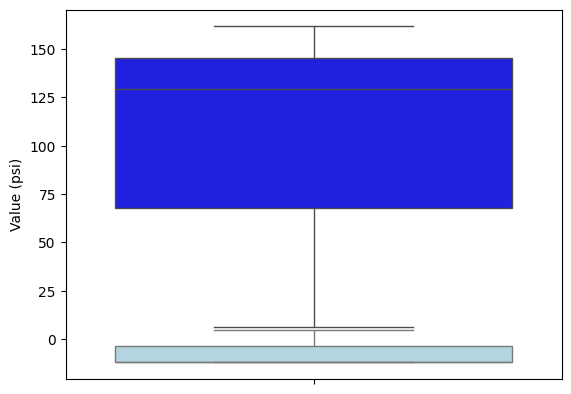

In [151]:
mask_grt_100 = df_40_50['Instant fuel economy (MPG)'] > 100
mpg_grt_100_40_50 = mask_grt_100.sum()
mask_lte_100 = df_40_50['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_40_50 = mask_lte_100.sum()

mph_40_50_boost_mean =df_40_50['Boost (psi)'].mean().round(2) 
mph_40_50_boost_quantiles=df_40_50['Boost (psi)'].quantile([0.25,0.50,0.75])
df_40_50_boost_quantiles = pd.DataFrame(mph_40_50_boost_quantiles)
df_40_50_boost_quantiles = df_40_50_boost_quantiles.reset_index()
df_40_50_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_40_50_count=len(df_40_50)
mpg_40_50_mpg_mean=df_40_50['Instant fuel economy (MPG)'].mean().round(2)
mpg_40_50_100_quantiles=df_40_50['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_40_50_100_per=((mpg_grt_100_40_50/mpg_40_50_count)*100).round(2)
df_40_50_100_quantiles = pd.DataFrame(mpg_40_50_100_quantiles)
df_40_50_100_quantiles = df_40_50_100_quantiles.reset_index()
df_40_50_100_quantiles.columns = ['Percentile', '40-50mph (mpg)']

print("40-50mph")
print(f"Average Boost: {mph_40_50_boost_mean}")
print(f"Value Counts: {mpg_40_50_count}")
print(f"Values > 100mpg: {mpg_grt_100_40_50}")
print(f"Values <= 100mpg: {mpg_lte_100_40_50}")
print(f"Percent above 100mpg: {mpg_40_50_100_per}%")
print(f"Mean MPG: {mpg_40_50_mpg_mean}")
print("mpg Quartiles")
print(df_40_50_100_quantiles)
print("Boost Quartiles")
print(df_40_50_boost_quantiles)
sns.boxplot(y=df_40_50_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_40_50_100_quantiles['40-50mph (mpg)'], color='blue')

50-60mph
Average Boost: -3.77
Value Counts: 81
Values > 100mpg: 21
Values <= 100mpg: 60
Percent above 100mpg: 25.93%
Mean MPG: 57.83
mpg Quartiles
   Percentile  50-60mph (mpg)
0        0.25            17.4
1        0.50            36.5
2        0.75           107.2
Boost Quartiles
   Percentile  Value (psi)
0        0.25        -10.0
1        0.50         -3.9
2        0.75          0.9


<Axes: ylabel='Value (psi)'>

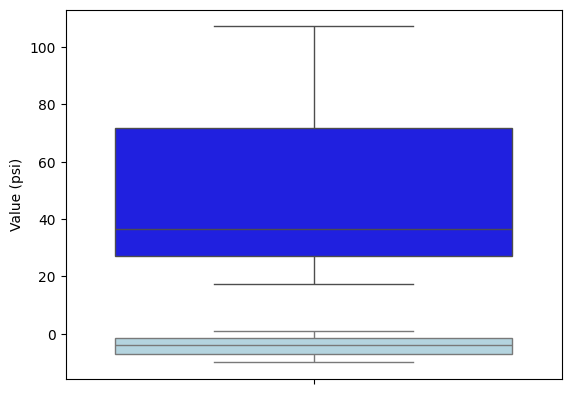

In [152]:
mask_grt_100 = df_50_60['Instant fuel economy (MPG)'] > 100
mpg_grt_100_50_60 = mask_grt_100.sum()
mask_lte_100 = df_50_60['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_50_60 = mask_lte_100.sum()

mph_50_60_boost_mean =df_50_60['Boost (psi)'].mean().round(2) 
mph_50_60_boost_quantiles=df_50_60['Boost (psi)'].quantile([0.25,0.50,0.75])
df_50_60_boost_quantiles = pd.DataFrame(mph_50_60_boost_quantiles)
df_50_60_boost_quantiles = df_50_60_boost_quantiles.reset_index()
df_50_60_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_50_60_count=len(df_50_60)
mpg_50_60_mpg_mean=df_50_60['Instant fuel economy (MPG)'].mean().round(2)
mpg_50_60_100_quantiles=df_50_60['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_50_60_100_per=((mpg_grt_100_50_60/mpg_50_60_count)*100).round(2)
df_50_60_100_quantiles = pd.DataFrame(mpg_50_60_100_quantiles)
df_50_60_100_quantiles = df_50_60_100_quantiles.reset_index()
df_50_60_100_quantiles.columns = ['Percentile', '50-60mph (mpg)']

print("50-60mph")
print(f"Average Boost: {mph_50_60_boost_mean}")
print(f"Value Counts: {mpg_50_60_count}")
print(f"Values > 100mpg: {mpg_grt_100_50_60}")
print(f"Values <= 100mpg: {mpg_lte_100_50_60}")
print(f"Percent above 100mpg: {mpg_50_60_100_per}%")
print(f"Mean MPG: {mpg_50_60_mpg_mean}")
print("mpg Quartiles")
print(df_50_60_100_quantiles)
print("Boost Quartiles")
print(df_50_60_boost_quantiles)
sns.boxplot(y=df_50_60_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_50_60_100_quantiles['50-60mph (mpg)'], color='blue')

60-70mph
Average Boost: -3.32
Value Counts: 1224
Values > 100mpg: 199
Values <= 100mpg: 1025
Percent above 100mpg: 16.26%
Mean MPG: 49.54
mpg Quartiles
   Percentile  60-70mph (mpg)
0        0.25          20.200
1        0.50          34.300
2        0.75          61.525
Boost Quartiles
   Percentile  Value (psi)
0        0.25        -7.70
1        0.50        -3.25
2        0.75         0.60


<Axes: ylabel='Value (psi)'>

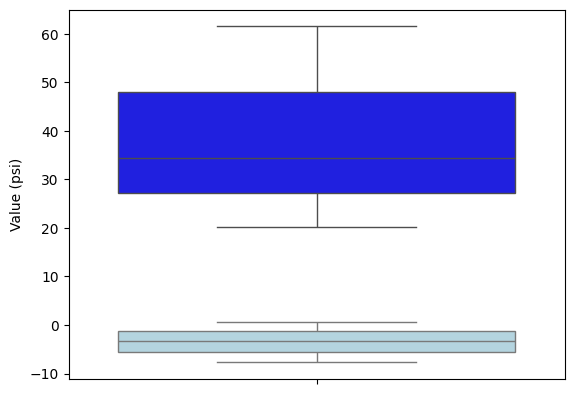

In [153]:
mask_grt_100 = df_60_70['Instant fuel economy (MPG)'] > 100
mpg_grt_100_60_70 = mask_grt_100.sum()
mask_lte_100 = df_60_70['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_60_70 = mask_lte_100.sum()

mph_60_70_boost_mean =df_60_70['Boost (psi)'].mean().round(2) 
mph_60_70_boost_quantiles=df_60_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_60_70_boost_quantiles = pd.DataFrame(mph_60_70_boost_quantiles)
df_60_70_boost_quantiles = df_60_70_boost_quantiles.reset_index()
df_60_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_60_70_count=len(df_60_70)
mpg_60_70_mpg_mean=df_60_70['Instant fuel economy (MPG)'].mean().round(2)
mpg_60_70_100_quantiles=df_60_70['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_60_70_100_per=((mpg_grt_100_60_70/mpg_60_70_count)*100).round(2)
df_60_70_100_quantiles = pd.DataFrame(mpg_60_70_100_quantiles)
df_60_70_100_quantiles = df_60_70_100_quantiles.reset_index()
df_60_70_100_quantiles.columns = ['Percentile', '60-70mph (mpg)']

print("60-70mph")
print(f"Average Boost: {mph_60_70_boost_mean}")
print(f"Value Counts: {mpg_60_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_60_70}")
print(f"Values <= 100mpg: {mpg_lte_100_60_70}")
print(f"Percent above 100mpg: {mpg_60_70_100_per}%")
print(f"Mean MPG: {mpg_60_70_mpg_mean}")
print("mpg Quartiles")
print(df_60_70_100_quantiles)
print("Boost Quartiles")
print(df_60_70_boost_quantiles)
sns.boxplot(y=df_60_70_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_60_70_100_quantiles['60-70mph (mpg)'], color='blue')

Greater Than 70mph
Average Boost: -3.59
Value Counts: 355
Values > 100mpg: 38
Values <= 100mpg: 317
Percent above 100mpg: 10.7%
Mean MPG: 45.24
mpg Quartiles
   Percentile  Greater than 70mph (mpg)
0        0.25                     22.50
1        0.50                     35.10
2        0.75                     52.05
Boost Quartiles
   Percentile  Value (psi)
0        0.25        -6.75
1        0.50        -3.50
2        0.75        -0.50


<Axes: ylabel='Greater than 70mph (mpg)'>

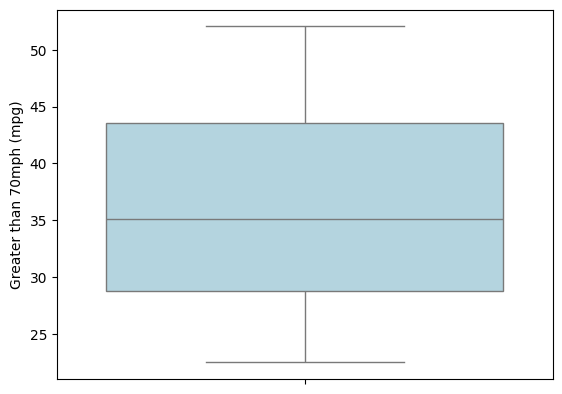

In [154]:
mask_grt_100 = df_grt_70['Instant fuel economy (MPG)'] > 100
mpg_grt_100_grt_70 = mask_grt_100.sum()
mask_lte_100 = df_grt_70['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_grt_70 = mask_lte_100.sum()

mph_grt_70_boost_mean =df_grt_70['Boost (psi)'].mean().round(2) 
mph_grt_70_boost_quantiles=df_grt_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_grt_70_boost_quantiles = pd.DataFrame(mph_grt_70_boost_quantiles)
df_grt_70_boost_quantiles = df_grt_70_boost_quantiles.reset_index()
df_grt_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_grt_70_count=len(df_grt_70)
mpg_grt_70_mpg_mean=df_grt_70['Instant fuel economy (MPG)'].mean().round(2)
mpg_grt_70_100_quantiles=df_grt_70['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_grt_70_100_per=((mpg_grt_100_grt_70/mpg_grt_70_count)*100).round(2)
df_grt_70_100_quantiles = pd.DataFrame(mpg_grt_70_100_quantiles)
df_grt_70_100_quantiles = df_grt_70_100_quantiles.reset_index()
df_grt_70_100_quantiles.columns = ['Percentile', 'Greater than 70mph (mpg)']

print("Greater Than 70mph")
print(f"Average Boost: {mph_grt_70_boost_mean}")
print(f"Value Counts: {mpg_grt_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_grt_70}")
print(f"Values <= 100mpg: {mpg_lte_100_grt_70}")
print(f"Percent above 100mpg: {mpg_grt_70_100_per}%")
print(f"Mean MPG: {mpg_grt_70_mpg_mean}")
print("mpg Quartiles")
print(df_grt_70_100_quantiles)
print("Boost Quartiles")
print(df_grt_70_boost_quantiles)
sns.boxplot(y=df_grt_70_100_quantiles['Greater than 70mph (mpg)'], color='lightblue')

In [155]:
mpg_count_list=[mpg_40_50_count, mpg_50_60_count, mpg_60_70_count, mpg_grt_70_count]
mpg_lte_100_count_list = [int(mpg_lte_100_40_50), int(mpg_lte_100_50_60), int(mpg_lte_100_60_70), int(mpg_lte_100_grt_70)]
mpg_grt_100_count_list = [int(mpg_grt_100_40_50), int(mpg_grt_100_50_60), int(mpg_grt_100_60_70), int(mpg_grt_100_grt_70)]
mpg_grt_100_per_list=[int(mpg_40_50_100_per),int(mpg_50_60_100_per),int(mpg_60_70_100_per),int(mpg_grt_70_100_per)]

mpg_100_df = pd.DataFrame({
    'total mpg counts': mpg_count_list,
    'total mpg <= 100 counts': mpg_lte_100_count_list,
    'total mpg > 100 counts': mpg_grt_100_count_list,
    '% > 100mpg':mpg_grt_100_per_list
}, index=['40-50mph', '50-60mph', '60-70mph', '>70mph'])

print(f'total mpg counts: {mpg_count_list}')
print(f'total mpg <= 100 counts: {mpg_lte_100_count_list}')
print(f'total mpg > 100 counts: {mpg_grt_100_count_list}')
print(f'% > 100mpg : {mpg_grt_100_per_list}')
mpg_100_df.head()

total mpg counts: [9, 81, 1224, 355]
total mpg <= 100 counts: [4, 60, 1025, 317]
total mpg > 100 counts: [5, 21, 199, 38]
% > 100mpg : [55, 25, 16, 10]


,total mpg counts,total mpg <= 100 counts,total mpg > 100 counts,% > 100mpg
40-50mph,9,4,5,55
50-60mph,81,60,21,25
60-70mph,1224,1025,199,16
>70mph,355,317,38,10


   Percentile  40-50mph (mpg)  50-60mph (mpg)  60-70mph (mpg)  \
0        0.25             6.4            17.4          20.200   
1        0.50           129.1            36.5          34.300   
2        0.75           161.6           107.2          61.525   

   Greater than 70mph (mpg)  
0                     22.50  
1                     35.10  
2                     52.05  


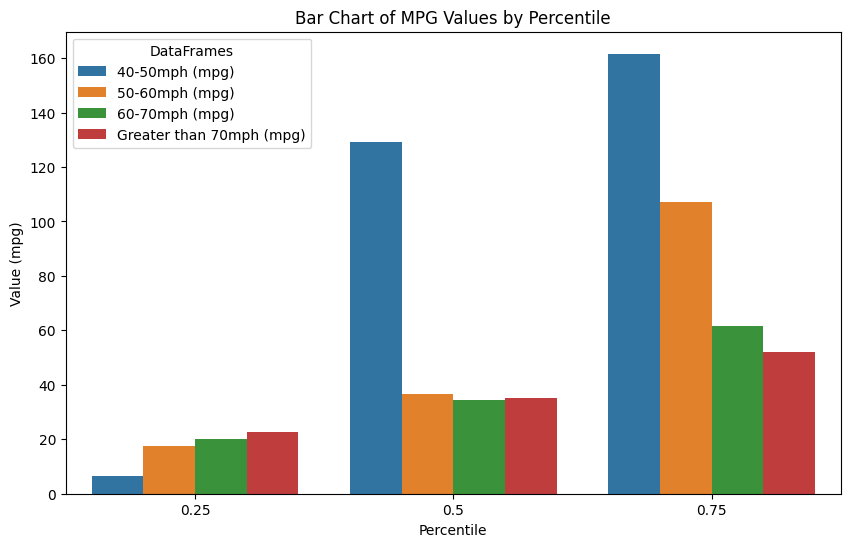

In [156]:
# Merge DataFrames on 'Percentile'
df_quartiles = pd.merge(df_40_50_100_quantiles, df_50_60_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_60_70_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_grt_70_100_quantiles, on='Percentile')
df_quartiles.head()
print(df_quartiles)

df_long = pd.melt(df_quartiles, id_vars='Percentile', var_name='DataFrame', value_name='Value (mpg)')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Percentile', y='Value (mpg)', hue='DataFrame')
plt.title('Bar Chart of MPG Values by Percentile')
plt.xlabel('Percentile')
plt.ylabel('Value (mpg)')
plt.legend(title='DataFrames')
mpg_by_mph_file_path = os.path.join(output_folder_path, 'mpg_by_mph.jpeg')
plt.savefig(mpg_by_mph_file_path, format='jpeg', dpi=300)
plt.show()

In [157]:
df
#convert 
#df_less_10_geo=df_less_10.copy()
#df_less_10_geo.head()
#
#df_10_20_geo = df_10_20.copy()
#df_10_20_geo.head()
#
#df_20_30_geo = df_20_30.copy()
#df_20_30_geo.head()
#
#df_30_40_geo = df_30_40.copy()
#df_30_40_geo.head()
#
#df_40_50_geo = df_40_50.copy()
#df_40_50_geo.head()
#
#df_50_60_geo = df_50_60.copy()
#
#
#df_60_70_geo = df_60_70.copy()

df_55_75_geo = df_55_75.copy()





In [158]:
#map_center = [df_60_70['latitude'].mean(), df_60_70['longitude'].mean()]
#print(map_center)

In [159]:
print("Available colormaps:")
for name in dir(cm):
    if 'colormap' in name.lower():
        print(name)

Available colormaps:
ColorMap
LinearColormap
StepColormap
_LinearColormaps
_StepColormaps


In [160]:
df_map=df_moving.copy()
map_center = [44.980164, -93.185692]
m = folium.Map(location=map_center, zoom_start=11)
coordinates = df_map[['latitude', 'longitude', 'Vehicle speed (MPH)']].values.tolist()
sorted_coordinates = sorted(coordinates, key=lambda x: x[2])
colormap = cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'],  # Custom color range
    vmin=df_map['Vehicle speed (MPH)'].min(),
    vmax=df_map['Vehicle speed (MPH)'].max(),
    caption='Vehicle Speed (MPH)'   
)

colormap.add_to(m)



for i in range(len(df_map) - 1):
    # Coordinates of the current segment
    start = [df_map.iloc[i]['latitude'], df_map.iloc[i]['longitude']]
    end = [df_map.iloc[i + 1]['latitude'], df_map.iloc[i + 1]['longitude']]
    
    # Value for color mapping (use average or a specific value)
    segment_value = (df_map.iloc[i]['Vehicle speed (MPH)'] + df_map.iloc[i + 1]['Vehicle speed (MPH)']) / 2
    
    # Create and add a PolyLine for each segment
    folium.PolyLine(
        locations=[start, end],
        color=colormap(segment_value),  # Map value to color
        weight=5,
        opacity=1
        ).add_to(m)

# Save the map to an HTML file
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
m.save(map_moving_file_path)


In [161]:
#map_center = [44.980164, -93.185692]
#m = folium.Map(location=map_center, zoom_start=11)
#
#
## Prepare the list of coordinates for the PolyLine
#coordinates = df_55_75_geo[['latitude', 'longitude']].values.tolist()
#
## Add a PolyLine to the map
#folium.PolyLine(
#    locations=coordinates,
#    popup=[str(row['Time (sec)']) for idx, row in df_55_75_geo.iterrows()],
#    weight=5,
#    opacity=1,
#    color='blue'
#).add_to(m)

# Save the map to an HTML file
m.save('mpg_55_75_map.html')

In [162]:
hvexplorer = df.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'b2c16123-46f8-49f4-8e91-20c375b834ba': {'version…

In [163]:
df['Engine RPM (RPM)']=df['Engine RPM (RPM)']/100
df['Engine Power (hp)']=df['Engine Power (hp)']/10
df['Ambient air temperature (°F)']=df['Ambient air temperature (°F)']/10
#df['Intake air temperature bank 1  sensor 1 (°F)']=df['Intake air temperature bank 1  sensor 1 (°F)']/10
#df['Relative throttle position (%)']=df['Relative throttle position (%)']/10
#df[' Boost (psi)']=df[' Boost (psi)']/10
#df[' Mass air flow rate (lb/min)']=df[' Mass air flow rate (lb/min)']/10


#df['Boost (psi)']= df['Boost (psi)']/10


In [164]:
start_index = int(round(2227.003))  # or use int(2227.003)
end_index = int(round(2231.996))    # or use int(2255.994)

# Select rows between start_index and end_index (inclusive)
boosted = df.iloc[start_index:end_index + 1]

print(boosted.head())

Empty DataFrame
Columns: [Time (sec), Vehicle speed (MPH), Relative accelerator pedal position (%), Engine RPM (RPM), Boost (psi), Engine Power (hp), Mass air flow rate (lb/min), Intake manifold absolute pressure (inHg), Ambient air temperature (°F), Trip Distance (miles), Instant fuel economy (MPG), Trip Fuel Economy (MPG), Latitude (deg), Longitude (deg), Relative throttle position (%), Hard Brake Count]
Index: []


In [165]:
#boosted=df.iloc[2227:2233]
#boosted.head

In [166]:
boosted.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Engine RPM (RPM)','Boost (psi)','Relative throttle position (%)','Vehicle speed (MPH)' ], #'Engine Power (hp)'
    legend='bottom_right',
    widget_location='bottom',
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'c7787470-532f-47d0-9fad-677ad27054be': {'version…

In [167]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Mass Air/Boost'],
    legend='bottom_right',
    widget_location='bottom',
)

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['Mass Air/Boost']

PandasInterface expects tabular data, for more information on supported datatypes see https://holoviews.org/user_guide/Tabular_Datasets.html

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Mass Air/manPress'],
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y1='Intake air temperature bank 1  sensor 1 (°F)',
    y2='Boost (psi)',
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
moving_df.describe()